<h1 style = "color: seagreen;font-family: 'Comic Sans MS'">Insurance Data</h1>

In [4]:
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv(r"E:\PYTHON\python Datasets\data\aug_train.csv")

<h3 style ="color:darkblue"> Problem Statement</h3> <p>In this article, we’ll be using vehicle insurance data to predict whether a customer will be interested in
buying the vehicle’s insurance policy or not. Ideally, the dataset we use in machine learning should have a
balanced ratio of target variables for the model to give unbiased results. But as we discussed earlier, the
probability of happening of any accident in a sample population is significantly rare. Similarly, the chances
for a person interested in buying an insurance policy from a sample of people are quite low. Therefore, the
dataset we are using in this article is highly imbalanced, and we will see how using the dataset as it is will
result in poor and biased results. Therefore, we will have to apply techniques to balance the data first
before moving on to the modeling part.<p>

### EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


In [4]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0


In [4]:
from pandas_profiling import ProfileReport
report = ProfileReport(data)
report.to_file(output_file='insurance.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

0    319553
1     62601
Name: Response, dtype: int64


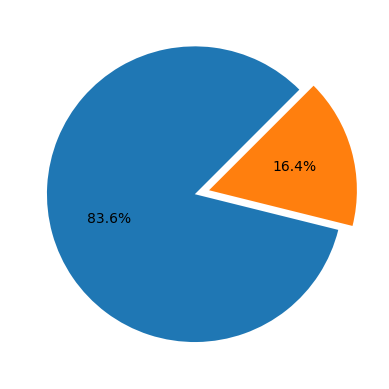

In [8]:
print(data.Response.value_counts())
plt.pie(data.Response.value_counts(),autopct = "%1.1f%%",explode = [0, .1],startangle=45)
plt.show()

<p> Only 16% of the insurance policies received a response<p>

In [9]:
gender_counts = data[data['Vehicle_Damage'] == 'Yes'].groupby('Gender').size()

In [10]:
gender_counts

Gender
Female     75284
Male      108369
dtype: int64

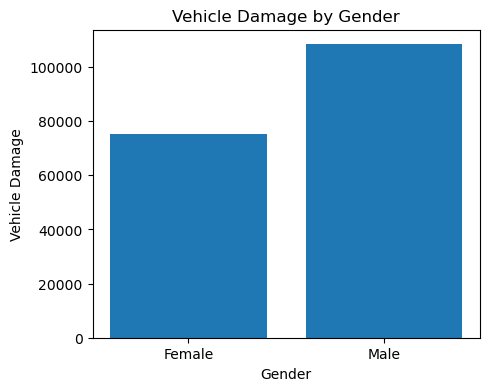

In [11]:
plt.figure(figsize=(5,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Vehicle Damage')
plt.title('Vehicle Damage by Gender')
plt.show()

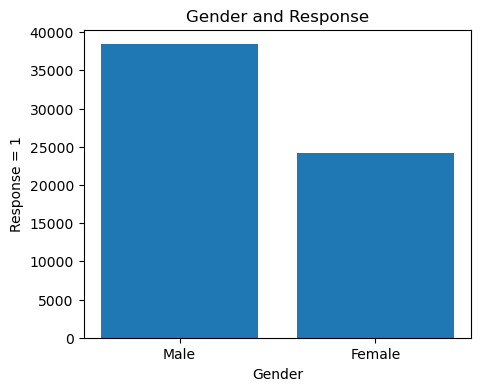

In [12]:
gender_counts = data[data['Response'] == 1]['Gender'].value_counts()

plt.figure(figsize=(5,4))
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Response = 1')
plt.title('Gender and Response')
plt.show()

In [13]:
data['Vehicle_Damage'] = data['Vehicle_Damage'].replace({'Yes': 1, 'No': 0})
data['Vehicle_Age'] = data['Vehicle_Age'].replace({'< 1 Year': 1, '1-2 Year': 2, '> 2 Years': 3})
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})

In [14]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,0,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,0,42,1,28.0,0,2,1,43327.0,26.0,135,0
2,32023,1,66,1,33.0,0,2,1,35841.0,124.0,253,0
3,87447,1,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,0,28,1,46.0,1,1,0,29023.0,152.0,211,0


In [15]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

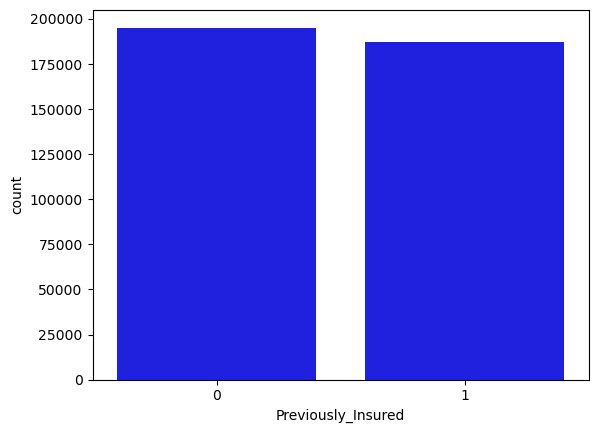

In [16]:
sns.countplot(x = data.Previously_Insured,color = 'blue',data = data)
plt.show()

In [17]:
previously_insured_counts = data[data['Response'] == 1]['Previously_Insured'].value_counts()

0    62466
1      135
Name: Previously_Insured, dtype: int64


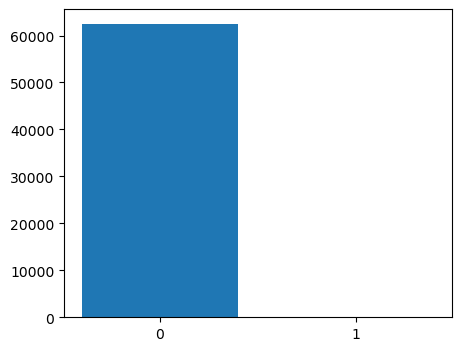

In [18]:
print(previously_insured_counts)
plt.figure(figsize=(5,4))
plt.bar(previously_insured_counts.index.astype(str), previously_insured_counts.values)
plt.show()

Out of the total records, only 135 (0.22%) responses were received for already insured vehicles.

Vehicle_Age
1     7544
2    48792
3     6265
Name: Response, dtype: int64


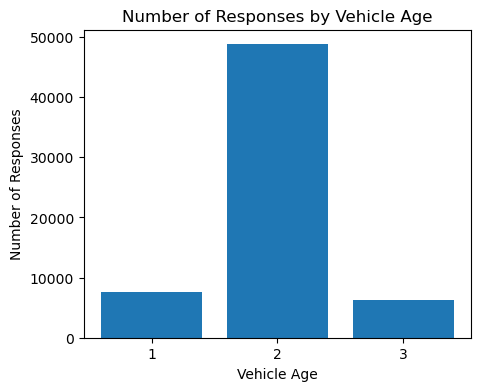

In [19]:
grouped_data = data.groupby('Vehicle_Age')['Response'].sum()

print(grouped_data)

plt.figure(figsize=(5,4))
plt.bar(grouped_data.index.astype(str), grouped_data.values)
plt.xlabel('Vehicle Age')
plt.ylabel('Number of Responses')
plt.title('Number of Responses by Vehicle Age')
plt.show()

Vehicle age of 1-2 years received the highest number of responses, indicating a higher likelihood of response for vehicles in this age range

In [20]:
data.Region_Code.nunique()

53

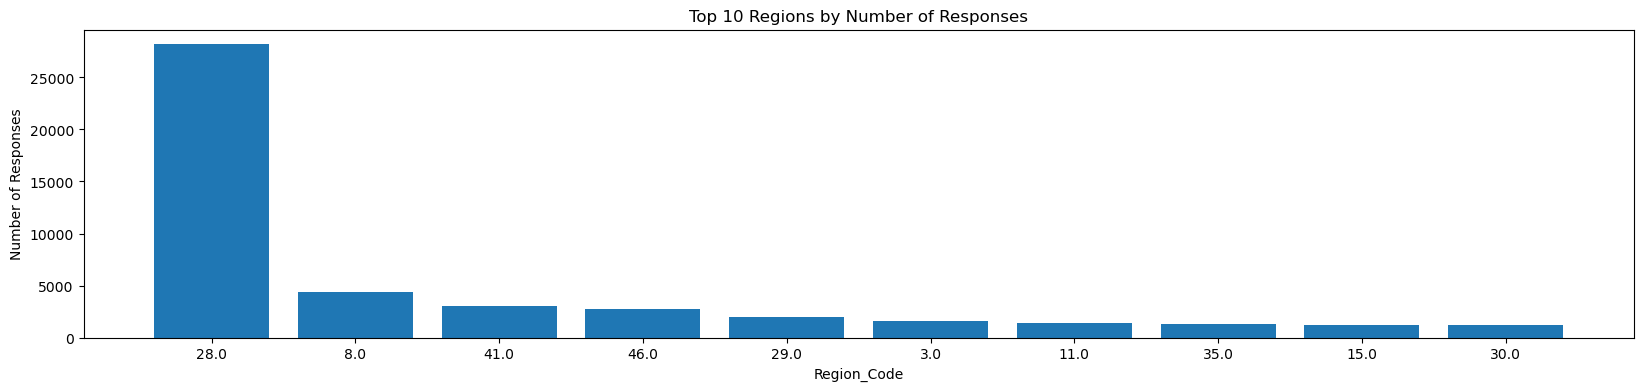

In [21]:
grouped_data = data.groupby('Region_Code')['Response'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(20, 4))
plt.bar(grouped_data.index.astype(str), grouped_data.values)
plt.xlabel('Region_Code')
plt.ylabel('Number of Responses')
plt.title('Top 10 Regions by Number of Responses')
plt.show()


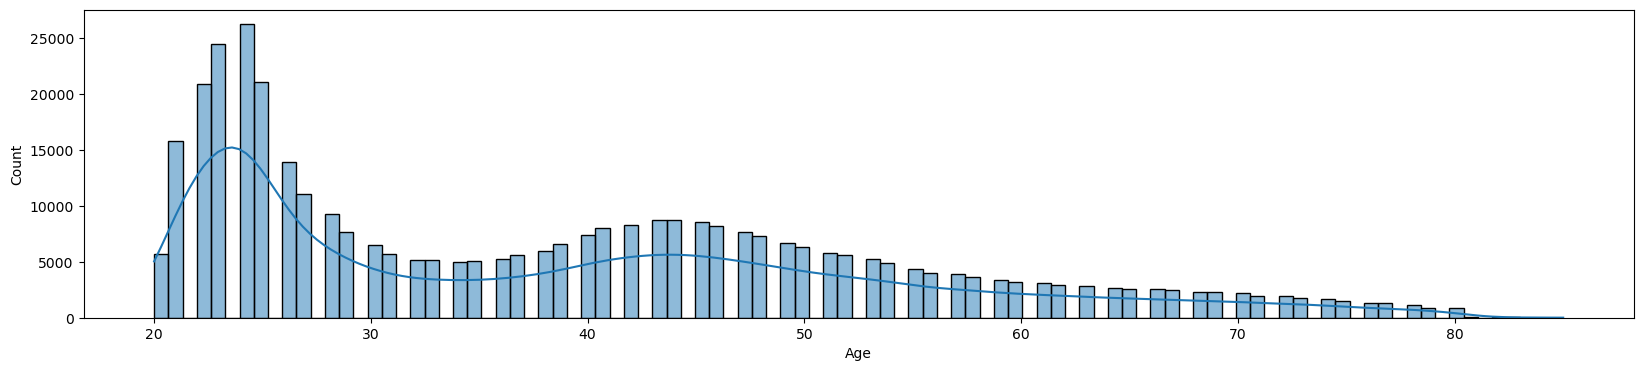

In [22]:
plt.figure(figsize=(20, 4))
sns.histplot(data['Age'], kde=True)
plt.show()

<h2 style ="color:darkblue">Modeling</h2> 

In [23]:
X = data.drop('Response', axis=1)
y = data['Response']

In [24]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

SMOTE is used to address class imbalance in datasets where the minority class has fewer samples. By generating synthetic samples for the minority class based on its existing data, SMOTE helps balance the dataset and prevent biased model results. It allows the model to learn the minority class patterns better, improving generalization and prediction performance, particularly for the minority class.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)
smote = SMOTE(random_state=15)

In [26]:
X_train,y_train = smote.fit_resample(X_train, y_train)

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [56]:
from sklearn import model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [29]:
models = []
models.append(('lr', LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF',RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('XGB', XGBClassifier()))

In [30]:
names=[]
results=[]
for name, model in models:
    Kfold=model_selection.KFold(n_splits=10,random_state=15,shuffle=True)
    cv_results=model_selection.cross_val_score(model, X_train, y_train, cv=Kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f"{name}: {cv_results.mean()} , {cv_results.std()}")

lr: 0.6534341420918033 , 0.0034787696044849058
CART: 0.8995421902459746 , 0.0015388312102132063
KNN: 0.7548517475680774 , 0.001231691368152345
LDA: 0.8148672315091066 , 0.0015382369784816663
XGB: 0.924909298802258 , 0.0009386367595376763


In [63]:
model1 = RandomForestClassifier().fit(X_train,y_train)
model2 = DecisionTreeClassifier().fit(X_train,y_train)
model3 = XGBClassifier(n_estimators=500,max_depth=1).fit(X_train,y_train)

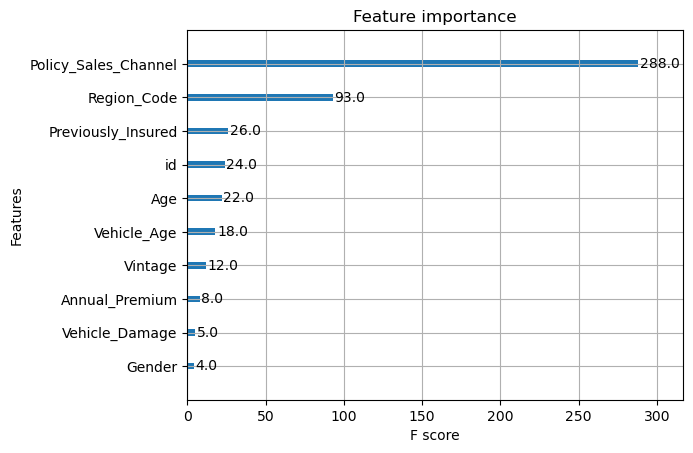

In [66]:
from xgboost import plot_importance
plot_importance(model3)
plt.show()

In [67]:
y_pred_R = model1.predict(X_test)
y_pred_D = model2.predict(X_test)
y_pred_XG = model3.predict(X_test)

<h2 style ="color:darkblue">Evaluation</h2> 

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_XG))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90     63769
           1       0.52      0.66      0.58     12662

    accuracy                           0.84     76431
   macro avg       0.72      0.77      0.74     76431
weighted avg       0.86      0.84      0.85     76431



In [69]:
print(classification_report(y_test,y_pred_R))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     63769
           1       0.61      0.56      0.58     12662

    accuracy                           0.87     76431
   macro avg       0.76      0.74      0.75     76431
weighted avg       0.86      0.87      0.87     76431



In [71]:
print(classification_report(y_test,y_pred_D))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     63769
           1       0.53      0.60      0.56     12662

    accuracy                           0.85     76431
   macro avg       0.73      0.75      0.73     76431
weighted avg       0.85      0.85      0.85     76431

